<a href="https://colab.research.google.com/github/vpagonis/Python-Codes/blob/main/Ch11PagonisGitHub/IR290LandT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FOM= 10.39  %
+---+------+---------+--------+----------+------+-------+
| A |  dA  |   rho   | d(rho) | s'(s^-1) | ds'  |  bgd  |
+---+------+---------+--------+----------+------+-------+
| 1 | 0.02 | 0.00428 | 0.0001 |  12.19   | 0.15 | 0.007 |
+---+------+---------+--------+----------+------+-------+


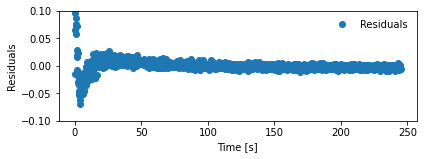

0.15
FOM= 12.14  %
+---+------+---------+---------+----------+------+-------+
| A |  dA  |   rho   |  d(rho) | s'(s^-1) | ds'  |  bgd  |
+---+------+---------+---------+----------+------+-------+
| 1 | 0.04 | 0.00306 | 0.00013 |  13.45   | 0.24 | 0.036 |
+---+------+---------+---------+----------+------+-------+


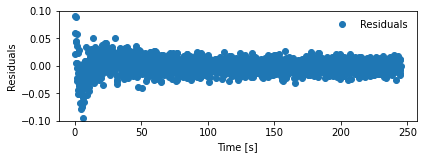

0.24
FOM= 11.39  %
+---+------+---------+---------+----------+------+-------+
| A |  dA  |   rho   |  d(rho) | s'(s^-1) | ds'  |  bgd  |
+---+------+---------+---------+----------+------+-------+
| 1 | 0.03 | 0.00382 | 0.00011 |  13.24   | 0.18 | 0.007 |
+---+------+---------+---------+----------+------+-------+


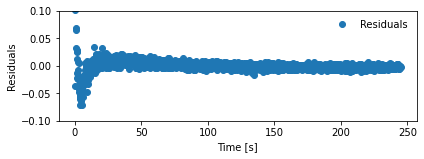

0.18
FOM= 13.04  %
+---+------+--------+---------+----------+------+-------+
| A |  dA  |  rho   |  d(rho) | s'(s^-1) | ds'  |  bgd  |
+---+------+--------+---------+----------+------+-------+
| 1 | 0.04 | 0.0034 | 0.00013 |  12.97   | 0.23 | 0.035 |
+---+------+--------+---------+----------+------+-------+


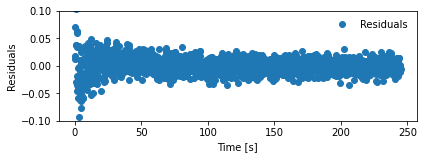

0.23
FOM= 9.75  %
+---+------+---------+--------+----------+------+-------+
| A |  dA  |   rho   | d(rho) | s'(s^-1) | ds'  |  bgd  |
+---+------+---------+--------+----------+------+-------+
| 1 | 0.02 | 0.00445 | 0.0001 |  12.57   | 0.15 | 0.007 |
+---+------+---------+--------+----------+------+-------+


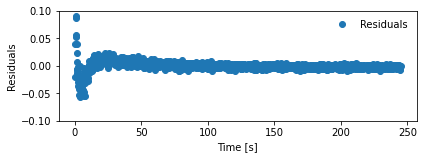

0.15
FOM= 12.17  %
+---+------+---------+---------+----------+------+-------+
| A |  dA  |   rho   |  d(rho) | s'(s^-1) | ds'  |  bgd  |
+---+------+---------+---------+----------+------+-------+
| 1 | 0.04 | 0.00243 | 0.00013 |   14.8   | 0.28 | 0.037 |
+---+------+---------+---------+----------+------+-------+


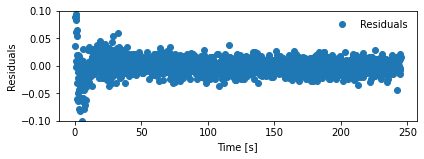

0.28
FOM= 9.72  %
+---+------+---------+--------+----------+------+-------+
| A |  dA  |   rho   | d(rho) | s'(s^-1) | ds'  |  bgd  |
+---+------+---------+--------+----------+------+-------+
| 1 | 0.02 | 0.00442 | 0.0001 |  12.98   | 0.16 | 0.006 |
+---+------+---------+--------+----------+------+-------+


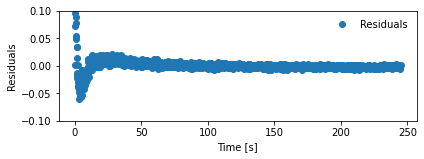

0.16
FOM= 11.64  %
+---+------+---------+---------+----------+------+-------+
| A |  dA  |   rho   |  d(rho) | s'(s^-1) | ds'  |  bgd  |
+---+------+---------+---------+----------+------+-------+
| 1 | 0.04 | 0.00322 | 0.00014 |  12.43   | 0.23 | 0.047 |
+---+------+---------+---------+----------+------+-------+


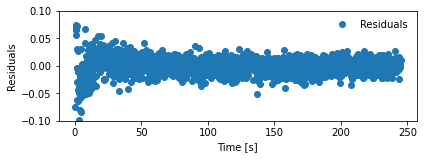

0.23
FOM= 9.83  %
+---+------+---------+--------+----------+------+-------+
| A |  dA  |   rho   | d(rho) | s'(s^-1) | ds'  |  bgd  |
+---+------+---------+--------+----------+------+-------+
| 1 | 0.02 | 0.00452 | 0.0001 |  13.02   | 0.16 | 0.006 |
+---+------+---------+--------+----------+------+-------+


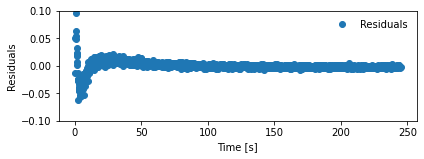

0.16
FOM= 10.94  %
+---+------+---------+---------+----------+------+-------+
| A |  dA  |   rho   |  d(rho) | s'(s^-1) | ds'  |  bgd  |
+---+------+---------+---------+----------+------+-------+
| 1 | 0.04 | 0.00235 | 0.00013 |  14.16   | 0.27 | 0.048 |
+---+------+---------+---------+----------+------+-------+


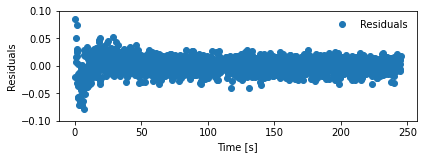

0.27
FOM= 32.27  %
+----+-----+----------+--------+----------+-----+-------+
| A  |  dA |   rho    | d(rho) | s'(s^-1) | ds' |  bgd  |
+----+-----+----------+--------+----------+-----+-------+
| 33 | inf | 48.64688 |  inf   |  65.55   | inf | 0.353 |
+----+-----+----------+--------+----------+-----+-------+


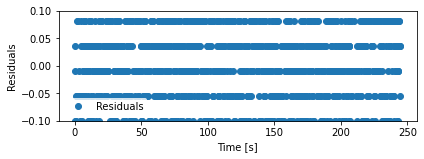

inf
FOM= 16.55  %
+---+------+---------+---------+----------+------+-------+
| A |  dA  |   rho   |  d(rho) | s'(s^-1) | ds'  |  bgd  |
+---+------+---------+---------+----------+------+-------+
| 1 | 0.04 | 0.00343 | 0.00015 |  13.86   | 0.28 | 0.021 |
+---+------+---------+---------+----------+------+-------+


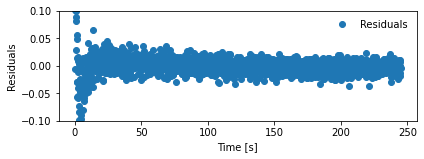

0.28
FOM= 10.64  %
+---+------+---------+---------+----------+------+-------+
| A |  dA  |   rho   |  d(rho) | s'(s^-1) | ds'  |  bgd  |
+---+------+---------+---------+----------+------+-------+
| 1 | 0.03 | 0.00417 | 0.00011 |  12.76   | 0.16 | 0.009 |
+---+------+---------+---------+----------+------+-------+


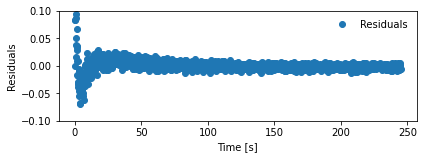

0.16
FOM= 13.96  %
+---+------+---------+---------+----------+------+-------+
| A |  dA  |   rho   |  d(rho) | s'(s^-1) | ds'  |  bgd  |
+---+------+---------+---------+----------+------+-------+
| 1 | 0.04 | 0.00328 | 0.00015 |  12.98   | 0.26 | 0.038 |
+---+------+---------+---------+----------+------+-------+


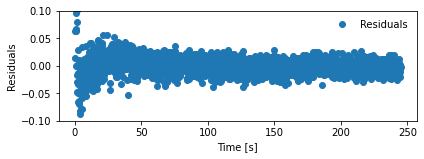

0.26
0.0036023076923076924 +- 0.000713368540486762


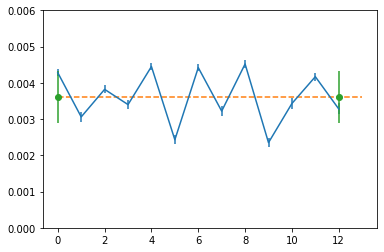

13.185384615384615 +- 0.05051216972117541


<ErrorbarContainer object of 3 artists>

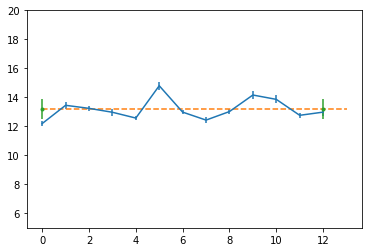

In [2]:
# J1000 CW-IRSL data fitted with KP-CW equation
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

url='https://github.com/vpagonis/Python-Codes/raw/main/Ch11PagonisGitHub/IR290LandT.TXT'
df =pd.read_table(url,delimiter='\t')
rhos, drhos, As ,dAs =[0]*df.shape[1],[0]*df.shape[1],[0]*df.shape[1],[0]*df.shape[1]
 
for i in range(1,df.shape[1],1):
    x_data,y_data = df.iloc[:, 0].to_numpy(), df.iloc[:, i].to_numpy()
    y_data=y_data/max(y_data)
    def test_func(x, imax_fit,rho_fit, A_fit,bgd_fit):
        return imax_fit*np.exp (-rho_fit*(np.log(1 + A_fit*x))\
    	** 3.0)*(np.log(1+A_fit*x)**2.0)/(1+x*A_fit)+bgd_fit
    params, cov = optimize.curve_fit(test_func,\
    x_data, y_data)
    drho= round(np.sqrt(cov[1][1]),5)
    dA = round(np.sqrt(cov[2][2]),2)
    dimax = round(np.sqrt(cov[0][2]),2)
    plt.scatter(x_data, y_data, label='J1000 feldspar')
    plt.plot(x_data, test_func(x_data, *params[0:4]),
    label='KP-CW equation')
    leg = plt.legend()
    leg.get_frame().set_linewidth(0.0)
    plt.ylabel('CW-IRSL signal [a.u.]')
    plt.xlabel('Time [s]')
    plt.subplot(2,1, 2)
    plt.plot(x_data,test_func(x_data, *params[0:4])-\
    y_data,"o",label='Residuals')
    leg = plt.legend()
    leg.get_frame().set_linewidth(0.0)
    plt.ylabel('Residuals')
    plt.xlabel('Time [s]')
    plt.ylim(-.1,.1)
    plt.tight_layout()
    imax,rho, A, bgd=int(params[0]),round(params[1],5),\
    round(params[2],2),round(params[-1],3)
    res=test_func(x_data, *params)-y_data
    FOM=round(100*np.sum(abs(res))/np.sum(y_data),2)
    myTable=PrettyTable(["A",'dA', "rho",  "d(rho)",\
    "s'(s^-1)","ds'",'bgd'])  
    myTable.add_row([imax,dimax,rho,drho, A, dA,bgd])
    print('FOM=',FOM,' %')
    print(myTable)
    plt.show()
    print(dA)
    rhos[i]= rho 
    As[i] = A
    drhos[i] = drho 
    dAs[i] =  dA

del rhos[11]  
del rhos[0]  
del drhos[11]  
del drhos[0]  
del As[11]  
del As[0]  
del dAs[11]  
del dAs[0] 
rhos
print(np.mean(rhos),'+-',np.std(rhos))

plt.errorbar(range(len(rhos)),rhos,yerr=drhos)
plt.ylim(0,.006)
point1 = [0,np.mean(rhos)]
point2 = [13,np.mean(rhos)]
x_values = [point1[0], point2[0]] 
y_values = [point1[1], point2[1]] 
plt. plot(x_values, y_values,'--')
plt.errorbar([0,12],[np.mean(rhos),np.mean(rhos)],
             yerr=[np.std(rhos),np.std(rhos)],fmt='o')
np.std(rhos)
plt.show()

As
print(np.mean(As),'+-',np.std(dAs))
plt.errorbar(range(len(As)),As,yerr=dAs)
plt.ylim(5,20)
point1 = [0,np.mean(As)]
point2 = [13,np.mean(As)]
x_values = [point1[0], point2[0]] 
y_values = [point1[1], point2[1]] 
plt. plot(x_values, y_values,'--')

plt.errorbar([0,12],[np.mean(As),np.mean(As)],
             yerr=[np.std(As),np.std(As)],fmt='.')
